# First import all necesssary modules

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [3]:
df=pd.read_csv("D:\Data Science Project\Advertising.csv")
df.head()

TV  radio  newspaper  sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3    9.3
3  151.5   41.3       58.5   18.5
4  180.8   10.8       58.4   12.9

# Understand the data

In [4]:
df.info

<bound method DataFrame.info of         TV  radio  newspaper  sales
0    230.1   37.8       69.2   22.1
1     44.5   39.3       45.1   10.4
2     17.2   45.9       69.3    9.3
3    151.5   41.3       58.5   18.5
4    180.8   10.8       58.4   12.9
..     ...    ...        ...    ...
195   38.2    3.7       13.8    7.6
196   94.2    4.9        8.1    9.7
197  177.0    9.3        6.4   12.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   13.4

[200 rows x 4 columns]>

In [5]:
df.describe()

TV       radio   newspaper       sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   14.022500
std     85.854236   14.846809   21.778621    5.217457
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   10.375000
50%    149.750000   22.900000   25.750000   12.900000
75%    218.825000   36.525000   45.100000   17.400000
max    296.400000   49.600000  114.000000   27.000000

# checking missing values

TypeError: isnull() takes 1 positional argument but 2 were given

# After understanding Data we consider there is no missing data

In [16]:
df.isnull()

TV  radio  newspaper  sales
0    False  False      False  False
1    False  False      False  False
2    False  False      False  False
3    False  False      False  False
4    False  False      False  False
..     ...    ...        ...    ...
195  False  False      False  False
196  False  False      False  False
197  False  False      False  False
198  False  False      False  False
199  False  False      False  False

[200 rows x 4 columns]

# Check skewness of data

array([[<AxesSubplot:title={'center':'TV'}>,
        <AxesSubplot:title={'center':'radio'}>],
       [<AxesSubplot:title={'center':'newspaper'}>,
        <AxesSubplot:title={'center':'sales'}>]], dtype=object)

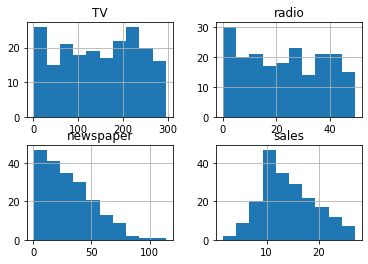

In [10]:
df.hist()

# Checking Outliers

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TV'>

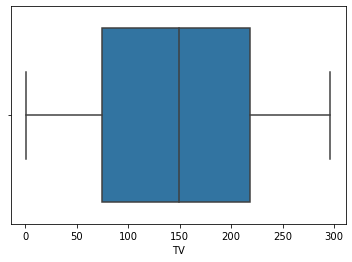

In [13]:
sns.boxplot(df['TV'])



C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='radio'>

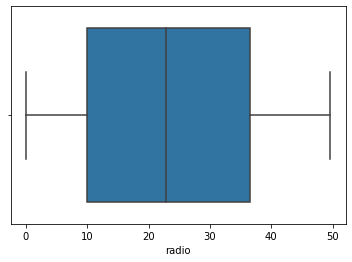

In [14]:
sns.boxplot(df['radio'])

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='newspaper'>

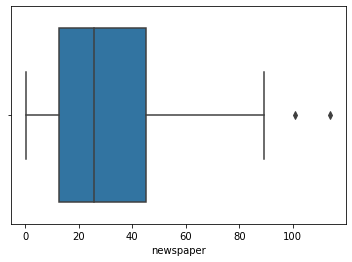

In [17]:
sns.boxplot(df['newspaper'])

there is outlier in newspaper

# reduce Outlier in DF

In [22]:
Q3=df['newspaper'].quantile(0.75)
Q3

45.1

In [24]:
Q1=df['newspaper'].quantile(0.25)
Q1

12.75

In [27]:
IQR=Q3-Q1
IQR
lower_limit=Q1-(IQR*1.5)
upper_limit=Q3+(IQR*1.5)
lower_limit,upper_limit

(-35.775000000000006, 93.625)

In [28]:
pip install feature_engine

Note: you may need to restart the kernel to use updated packages.


In [29]:
from feature_engine.outliers import Winsorizer


In [30]:
win=Winsorizer(capping_method="IQR",tail="both",fold=1.5,variables=["newspaper"])

ValueError: capping_method takes only values 'gaussian', 'iqr' or 'quantiles'